<a href="https://colab.research.google.com/github/JehadOumer/IMDB-Reviews-Classification/blob/main/Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import json
import seaborn as sns
from collections import defaultdict
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
training = pd.read_csv('/content/drive/MyDrive/IMDB Review Dataset Processed/processed_training_data.csv')
validation = pd.read_csv('/content/drive/MyDrive/IMDB Review Dataset Processed/processed_validation_data.csv')
testing = pd.read_csv('/content/drive/MyDrive/IMDB Review Dataset Processed/processed_testing_data.csv')

In [8]:
training=training.append(validation)

In [9]:
training.shape

(40000, 3)

In [10]:
training.head(5)

,Unnamed: 0,label,text
0,0,0,this be an absolutely terrible movie do not be...
1,1,0,pron have be know to fall asleep during film b...
2,2,0,person photograph org in a superb fashion and ...
3,3,1,this be the kind of film for a snowy date time...
4,4,1,as other have mention all the woman that go nu...


In [11]:
count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2))
count_vectorizer.fit((training['text']))
vectorized = count_vectorizer.transform(training['text'])
print(dict(list(count_vectorizer.vocabulary_.items())[0:8]))
print('The transformed data matrix dimensions:', vectorized.shape)

{'absolutely': 10319, 'terrible': 1413804, 'movie': 896993, 'lure': 825899, 'person': 1012593, 'great': 601565, 'actor': 22438, 'simply': 1285108}
The transformed data matrix dimensions: (40000, 1591398)


In [12]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(vectorized)
transformed_tfidf = tfidf_transformer.transform(vectorized)
print(transformed_tfidf.shape)
print(transformed_tfidf[0])

(40000, 1591398)
  (0, 1414221)	0.08793602654125718
  (0, 1413804)	0.05350588807318293
  (0, 1354380)	0.11938390561154634
  (0, 1354041)	0.06181956160874139
  (0, 1290376)	0.07656513069491042
  (0, 1289856)	0.052805213861689924
  (0, 1285893)	0.08228026533691596
  (0, 1285108)	0.05052340351040698
  (0, 1229499)	0.14853789886172988
  (0, 1228937)	0.031806446931356626
  (0, 1212192)	0.14301427196336414
  (0, 1212186)	0.0667809831980636
  (0, 1204820)	0.1360553250666177
  (0, 1204057)	0.042093808823733564
  (0, 1196262)	0.1360553250666177
  (0, 1195756)	0.05960791888535066
  (0, 1192566)	0.12804794251302956
  (0, 1192478)	0.08769909987128806
  (0, 1162173)	0.11860523996106072
  (0, 1162098)	0.07021426234855722
  (0, 1156957)	0.14301427196336414
  (0, 1156879)	0.08762103123274102
  (0, 1149255)	0.12020979120582335
  (0, 1148277)	0.03971507939888951
  (0, 1122402)	0.14853789886172988
  :	:
  (0, 413390)	0.11587151508806177
  (0, 412986)	0.051459638474410985
  (0, 378557)	0.10266542932162263

In [13]:
def get_metrics(predicted,true):
    metrics = dict()
    metrics['accuracy'] = round(accuracy_score(predicted, true), 5)
    metrics['precision'] = round(precision_score(predicted, true, average = 'weighted'), 5)
    metrics['recall'] = round(recall_score(predicted, true, average = 'weighted'), 5)
    metrics['f1'] = round(f1_score(predicted, true, average = 'weighted'), 5)
    
    return metrics

In [14]:
pipeline_SVM = Pipeline([
        ('count_vectorizer', CountVectorizer(stop_words='english', ngram_range=(1,2) )),  
        ('tfidf_transformer', TfidfTransformer()),  
        ('classifier', LinearSVC())
    ])

In [15]:
pipeline_SVM.fit(training['text'], training['label'])
prediction_SVM = pipeline_SVM.predict(testing['text'])

In [16]:
print(classification_report(testing['label'], prediction_SVM))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4970
           1       0.88      0.92      0.90      5030

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [18]:
metrics_SVM = get_metrics(prediction_SVM, testing['label'])
print(metrics_SVM)
with open("SVM_results.json", "w") as output:
    json.dump(metrics_SVM, output)

{'accuracy': 0.8975, 'precision': 0.89825, 'recall': 0.8975, 'f1': 0.89755}


In [19]:
pipeline_LR = Pipeline([
        ('count_vectorizer', CountVectorizer(stop_words='english', ngram_range=(1,2))),  
        ('tfidf_transformer', TfidfTransformer()),  
        ('classifier', LogisticRegression())
    ])

In [26]:
pipeline_LR.fit(training['text'], training['label'])
prediction_LR = pipeline_LR.predict(testing['text'])

print(classification_report(testing['label'], prediction_LR))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4970
           1       0.87      0.91      0.89      5030

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [27]:
metrics_LR = get_metrics(prediction_LR, testing['label'])
print(metrics_LR)
with open("LR_results.json", "w") as output:
    json.dump(metrics_LR, output)

{'accuracy': 0.8838, 'precision': 0.88482, 'recall': 0.8838, 'f1': 0.88387}


In [28]:
pipeline_NB = Pipeline([
        ('count_vectorizer', CountVectorizer(stop_words='english', ngram_range=(1,2))),  
        ('tfidf_transformer', TfidfTransformer()),  
        ('classifier', MultinomialNB())
    ])

In [29]:
pipeline_NB.fit(training['text'], training['label'])
prediction_NB = pipeline_NB.predict(testing['text'])

print(classification_report(testing['label'], prediction_NB))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      4970
           1       0.86      0.89      0.87      5030

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [30]:
metrics_NB = get_metrics(prediction_NB, testing['label'])
print(metrics_NB)
with open("NB_results.json", "w") as output:
    json.dump(metrics_NB, output)

{'accuracy': 0.8703, 'precision': 0.87088, 'recall': 0.8703, 'f1': 0.87035}


In [ ]:
pipeline_RF = Pipeline([
        ('count_vectorizer', CountVectorizer(stop_words='english', ngram_range=(1,2))),  
        ('tfidf_transformer', TfidfTransformer()),  
        ('classifier', RandomForestClassifier(n_estimators = 1000, random_state = 42))
    ])

In [ ]:
pipeline_RF.fit(training['text'], training['label'])
prediction_RF = pipeline_RF.predict(testing['text'])

print(classification_report(testing['label'], prediction_RF))

KeyboardInterrupt: ignored

In [ ]:
pipeline_RF.fit(training['text'], training['label'])
prediction_RF = pipeline_RF.predict(testing['text'])

print(classification_report(testinh['label'], prediction_RF))

In [ ]:
metrics_RF = get_metrics(prediction_RF, testing['label'])
print(metrics_RF)

with open("RF_results.json", "w") as output:
    json.dump(metrics_RF, output)

In [31]:
pipeline_KM = Pipeline([
        ('count_vectorizer', CountVectorizer(stop_words='english', ngram_range=(1,2))),  
        ('tfidf_transformer', TfidfTransformer()),  
        ('classifier', KMeans(n_clusters=2, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0))
    ])


In [32]:
pipeline_KM.fit(training['text'], training['label'])
prediction_KM = pipeline_KM.predict(testing['text'])

print(classification_report(testing['label'], prediction_KM))

              precision    recall  f1-score   support

           0       0.51      0.52      0.51      4970
           1       0.51      0.50      0.51      5030

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000



In [33]:
metrics_KM = get_metrics(prediction_KM, testing['label'])
print(metrics_KM)
with open("KM_results.json", "w") as output:
    json.dump(metrics_KM, output)

{'accuracy': 0.5089, 'precision': 0.50907, 'recall': 0.5089, 'f1': 0.50893}


In [50]:
pipeline_DT = Pipeline([
        ('count_vectorizer', CountVectorizer(stop_words='english', ngram_range=(1,2))),  
        ('tfidf_transformer', TfidfTransformer()),  
        ('classifier', DecisionTreeClassifier(random_state=100))
    ])

In [51]:
pipeline_DT.fit(training['text'], training['label'])
prediction_DT = pipeline_DT.predict(testing['text'])

print(classification_report(testing['label'], prediction_DT))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      4970
           1       0.72      0.72      0.72      5030

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [52]:
metrics_DT = get_metrics(prediction_DT, testing['label'])
print(metrics_DT)
with open("DT_results.json", "w") as output:
    json.dump(metrics_DT, output)

{'accuracy': 0.7201, 'precision': 0.72013, 'recall': 0.7201, 'f1': 0.7201}


In [20]:
pipeline_SGD = Pipeline([
        ('count_vectorizer', CountVectorizer(stop_words='english', ngram_range=(1,2))),  
        ('tfidf_transformer', TfidfTransformer()),  
        ('classifier', SGDClassifier())
    ])

In [21]:
pipeline_SGD.fit(training['text'], training['label'])
prediction_SGD = pipeline_SGD.predict(testing['text'])

print(classification_report(testing['label'], prediction_SGD))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      4970
           1       0.86      0.91      0.89      5030

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [22]:
metrics_SGD = get_metrics(prediction_SGD, testing['label'])
print(metrics_SGD)
with open("SGD_results.json", "w") as output:
    json.dump(metrics_SGD, output)

{'accuracy': 0.8814, 'precision': 0.88337, 'recall': 0.8814, 'f1': 0.88154}


In [23]:
pipeline_KNN = Pipeline([
        ('count_vectorizer', CountVectorizer(stop_words='english', ngram_range=(1,2))),  
        ('tfidf_transformer', TfidfTransformer()),  
        ('classifier', KNeighborsClassifier(n_neighbors = 2))
    ])

In [24]:
pipeline_KNN.fit(training['text'], training['label'])
prediction_KNN = pipeline_KNN.predict(testing['text'])

print(classification_report(testing['label'], prediction_KNN))

              precision    recall  f1-score   support

           0       0.65      0.57      0.61      4970
           1       0.62      0.70      0.66      5030

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.63     10000
weighted avg       0.64      0.63      0.63     10000



In [25]:
metrics_KNN = get_metrics(prediction_KNN, testing['label'])
print(metrics_KNN)
with open("KNN_results.json", "w") as output:
    json.dump(metrics_KNN, output)

{'accuracy': 0.6348, 'precision': 0.64396, 'recall': 0.6348, 'f1': 0.63658}


In [53]:
models=[]
acc=[]

models.append('SVM')
acc.append(metrics_SVM['accuracy'])

models.append('Logistic Regression')
acc.append(metrics_LR['accuracy'])

#models.append('Random Forest')
#acc.append(metrics_RF['accuracy'])

models.append('K-Means')
acc.append(metrics_KM['accuracy'])

models.append('Decision Tree')
acc.append(metrics_DT['accuracy'])

models.append('SGD')
acc.append(metrics_SGD['accuracy'])

models.append('KNN')
acc.append(metrics_KNN['accuracy'])

In [54]:
print(models)
print(acc)

['SVM', 'Logistic Regression', 'K-Means', 'Decision Tree', 'SGD', 'KNN']
[0.8975, 0.8838, 0.5089, 0.7201, 0.8814, 0.6348]


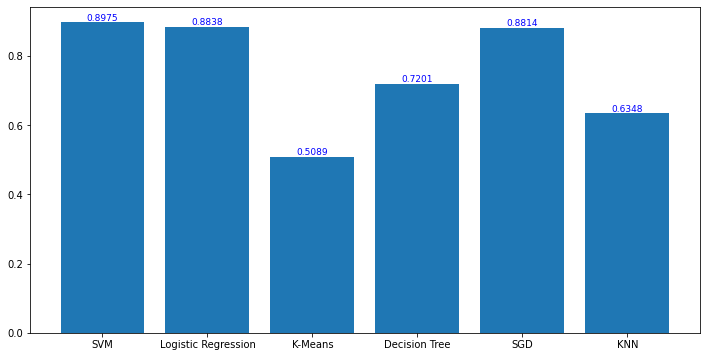

In [55]:

plt.figure(figsize=(12,6))
plt.bar(models, acc)

for i, v in enumerate(models):
    plt.text(v, acc[i], acc[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')
plt.show()

In [56]:
knn_results = {"accuracy": 0.6348, "precision": 0.64396, "recall": 0.6348, "f1": 0.63658}
svm_results = {"accuracy": 0.8975, "precision": 0.89825, "recall": 0.8975, "f1": 0.89755}
lr_results = {"accuracy": 0.8838, "precision": 0.88482, "recall": 0.8838, "f1": 0.88387}
nb_results = {"accuracy": 0.8703, "precision": 0.87088, "recall": 0.8703, "f1": 0.87035}
km_results = {"accuracy": 0.5089, "precision": 0.50907, "recall": 0.5089, "f1": 0.50893}
sgd_results = {"accuracy": 0.8814, "precision": 0.88337, "recall": 0.8814, "f1": 0.88154}
dt_results = {"accuracy": 0.7201, "precision": 0.72013, "recall": 0.7201, "f1": 0.7201}
measures = ('accuracy', 'precision', 'recall', 'f1') 
models = ('KNN', 'SVM', 'LR', 'NB', 'KM', 'SGD', 'DT')

results = [knn_results, svm_results, lr_results, nb_results, km_results, sgd_results, dt_results]

In [57]:
results_data = defaultdict(list)
for result in results:
  for measure in measures:
    results_data[measure].append(result[measure])

res_DF = pd.DataFrame.from_dict(results_data)
res_DF.insert(0, 'model', models)
res_DF

,model,accuracy,precision,recall,f1
0,KNN,0.6348,0.64396,0.6348,0.63658
1,SVM,0.8975,0.89825,0.8975,0.89755
2,LR,0.8838,0.88482,0.8838,0.88387
3,NB,0.8703,0.87088,0.8703,0.87035
4,KM,0.5089,0.50907,0.5089,0.50893
5,SGD,0.8814,0.88337,0.8814,0.88154
6,DT,0.7201,0.72013,0.7201,0.72010


In [58]:
def plot_results(metric):
  fig = plt.figure()
  ax1 = fig.add_axes((1,1,1,1))
  title = metric.capitalize() + ' Results'
  ax1.set_title(title)
  ax1.set_xlabel('Models')
  ax1.set_ylabel(metric.capitalize())
  ax1.plot(models,results_data[metric],c='red',linestyle='-',linewidth=1)
  ax1.grid(which='major')
  ax1.tick_params(direction='in')

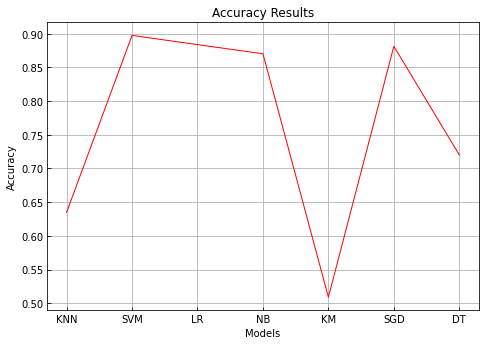

In [59]:
plot_results('accuracy')

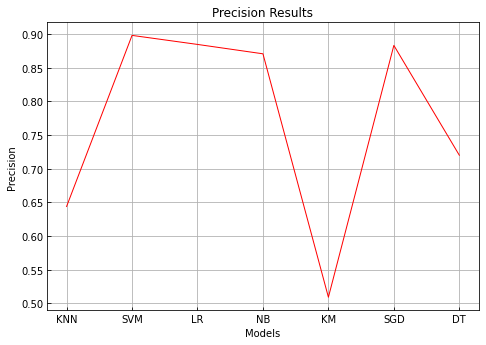

In [60]:
plot_results('precision')

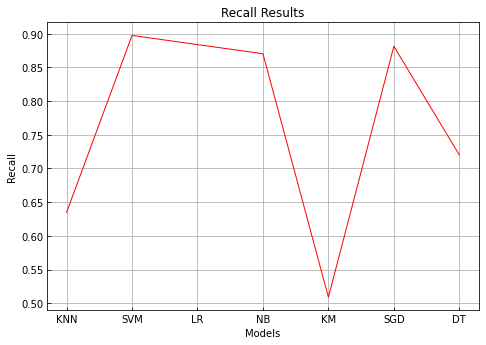

In [61]:
plot_results('recall')

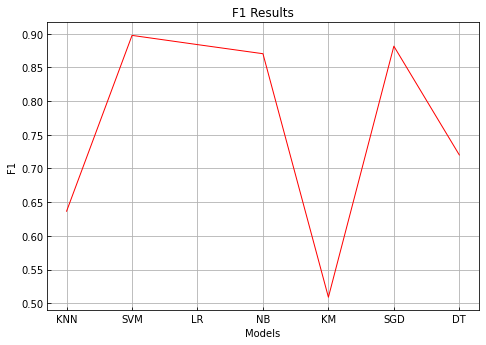

In [62]:
plot_results('f1')